Training time: 0.05103564262390137 seconds

Classification Report on Test Set:
              precision    recall  f1-score   support

       False       0.96      0.93      0.94     17512
        True       0.46      0.63      0.53      1714

    accuracy                           0.90     19226
   macro avg       0.71      0.78      0.74     19226
weighted avg       0.92      0.90      0.91     19226



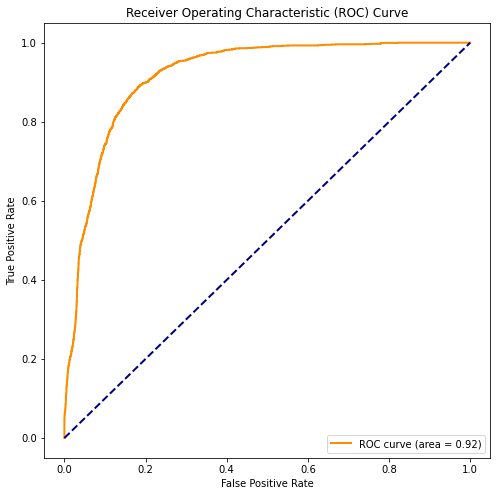

5-fold Cross-Validation AUC Scores: [0.91852536 0.92298809 0.9238067  0.91922964 0.92352378]
Mean AUC: 0.9216147141981553


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import time

# Read the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Remove duplicate rows in the dataset
df.drop_duplicates(inplace=True)

# Filter out rows with gender 'Other'
df = df[df['gender'] != 'Other']

# Drop the 'smoking_history' column
df.drop(['smoking_history'], axis=1, inplace=True)

# Use pd.get_dummies to one-hot encode remaining categorical columns
df = pd.get_dummies(df, columns=['hypertension', 'heart_disease', 'gender', 'diabetes'], drop_first=True)

# Separate features (X) and target variable (y)
X = df.drop(['diabetes_1'], axis=1)
y = df['diabetes_1']

# Rescale features using Min-Max scaling to ensure uniform scale
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_rescaled, columns=X.columns)

# Initialize Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Start time
start_time = time.time()

# Build the Naive Bayes model using the training data
naive_bayes.fit(X_train, y_train)

# End time
end_time = time.time()

# Calculate elapsed time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

# Predict values on the test set
y_pred = naive_bayes.predict(X_test)

# Print classification report to evaluate model performance
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for positive class
y_prob = naive_bayes.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Apply k-fold cross-validation using KFold
k_folds = 5 
kf = KFold(n_splits=k_folds, shuffle=True, random_state=21)

# Perform cross-validation and print the results
auc_scores = cross_val_score(naive_bayes, X, y, cv=kf, scoring='roc_auc')
print(f"{k_folds}-fold Cross-Validation AUC Scores: {auc_scores}")
print(f"Mean AUC: {auc_scores.mean()}")
